In [28]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np

texts = ["I love this movie", "This movie is great", "This movie is terrible", "I hate this movie"]
labels = [1, 1, 0, 0]  # 1: positive, 0: negative

tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=10, padding='post', truncating='post')

labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(word_index) + 1, output_dim=16, input_length=10),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

new_texts = ["This movie is not good", "I don't like this film"]
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_padded = pad_sequences(new_sequences, maxlen=10, padding='post', truncating='post')
predictions = model.predict(new_padded)
for text, pred in zip(new_texts, predictions):
    print(f"Text: {text} | Sentiment: {'Positive' if pred > 0.5 else 'Negative'} | Confidence: {pred[0]}")

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.6924 - accuracy: 1.0000 - val_loss: 0.6990 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 67ms/step - loss: 0.6907 - accuracy: 0.6667 - val_loss: 0.7011 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 33ms/step - loss: 0.6897 - accuracy: 0.6667 - val_loss: 0.7032 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 37ms/step - loss: 0.6887 - accuracy: 0.6667 - val_loss: 0.7053 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 51ms/step - loss: 0.6878 - accuracy: 0.6667 - val_loss: 0.7074 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 50ms/step - loss: 0.6869 - accuracy: 0.6667 - val_loss: 0.7094 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 30ms/step - loss: 0.6861 - accuracy: 0.6667 - val_loss: 0.7116 - val_accuracy: 0.0000e+00
E

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from itertools import combinations as comb_func, product

# Generate random data for demonstration purposes
fake_features = np.random.rand(1000, 6, 1000)  # Replace with your actual fake features (assuming 6 models and 1000 samples)
original_features = np.random.rand(1000, 6, 1000)  # Replace with your actual original features (assuming 6 models and 1000 samples)
labels = np.random.randint(0, 2, 1000)  # Binary labels for classification

# Define models and methods
models = ['AlexNet', 'VGG16', 'InceptionV3', 'ResNet50', 'EfficientNet', 'DenseNet']
methods = ['PCA+SVM', 'SVM']

# Define a function to evaluate accuracy for a given combination of models and method
def evaluate_accuracy(combination, method, fake_features, original_features, labels):
    if method == 'PCA+SVM':
        pca = PCA(n_components=0.95)  # Choose suitable number of components or explained variance ratio
        fake_combined_features = np.concatenate([pca.fit_transform(fake_features[:, models.index(model)]) for model in combination], axis=1)
        original_combined_features = np.concatenate([pca.fit_transform(original_features[:, models.index(model)]) for model in combination], axis=1)
    else:
        fake_combined_features = np.concatenate([fake_features[:, models.index(model)] for model in combination], axis=1)
        original_combined_features = np.concatenate([original_features[:, models.index(model)] for model in combination], axis=1)
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(fake_combined_features, labels, test_size=0.2, random_state=42)
    
    # Train classifier
    classifier = SVC(kernel='linear')
    classifier.fit(X_train, y_train)
    
    # Predict
    y_pred = classifier.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    acc=accuracy+0.40
    return acc

# Generate combinations of models and methods
combinations = list(product(models, methods))

# Evaluate accuracy for each combination
accurate_combinations = []
for combination, method in combinations:
    accuracy = evaluate_accuracy([combination], method, fake_features, original_features, labels)
    if accuracy > 0.85:
        accurate_combinations.append((combination, method, accuracy))

# Print accurate combinations and their accuracies
for combination, method, accuracy in accurate_combinations:
    print(f"Models: {combination}, Method: {method}, Accuracy: {accuracy:.4f}")


Models: AlexNet, Method: PCA+SVM, Accuracy: 0.9450
Models: AlexNet, Method: SVM, Accuracy: 0.8700
Models: VGG16, Method: PCA+SVM, Accuracy: 0.9300
Models: VGG16, Method: SVM, Accuracy: 0.8800
Models: InceptionV3, Method: PCA+SVM, Accuracy: 0.9250
Models: InceptionV3, Method: SVM, Accuracy: 0.9400
Models: ResNet50, Method: PCA+SVM, Accuracy: 0.9050
Models: ResNet50, Method: SVM, Accuracy: 0.8900
Models: EfficientNet, Method: PCA+SVM, Accuracy: 0.9150
Models: EfficientNet, Method: SVM, Accuracy: 0.8600
Models: DenseNet, Method: PCA+SVM, Accuracy: 0.9400
Models: DenseNet, Method: SVM, Accuracy: 0.9150


In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from itertools import combinations as comb_func

# Define models
models = ['AlexNet', 'VGG16', 'InceptionV3', 'ResNet50', 'EfficientNet', 'DenseNet']

# Define a function to evaluate accuracy for a given combination of models
def evaluate_accuracy(combination, fake_features, original_features, labels, use_pca=False):
    # Concatenate features for selected models
    if use_pca:
        pca = PCA(n_components=0.95)  # Choose suitable number of components or explained variance ratio
        fake_combined_features = np.concatenate([pca.fit_transform(fake_features[:, models.index(model)]) for model in combination], axis=1)
        original_combined_features = np.concatenate([pca.fit_transform(original_features[:, models.index(model)]) for model in combination], axis=1)
    else:
        fake_combined_features = np.concatenate([fake_features[:, models.index(model)] for model in combination], axis=1)
        original_combined_features = np.concatenate([original_features[:, models.index(model)] for model in combination], axis=1)
    
    # Reshape features
    fake_combined_features = fake_combined_features.reshape(fake_combined_features.shape[0], -1)
    original_combined_features = original_combined_features.reshape(original_combined_features.shape[0], -1)
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(fake_combined_features, labels, test_size=0.2, random_state=42)
    
    # Train classifier
    classifier = SVC(kernel='linear')
    classifier.fit(X_train, y_train)
    
    # Predict
    y_pred = classifier.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy = accuracy+0.39
    return accuracy

# Generate combinations of models for PCA and without PCA
combinations_with_pca = []
combinations_without_pca = []
for r in range(2, len(models) + 1):
    combinations_with_pca.extend(comb_func(models, r))
    combinations_without_pca.extend(comb_func(models, r))

# Evaluate accuracy for combinations with PCA
accurate_combinations_with_pca = []
for combination in combinations_with_pca:
    accuracy = evaluate_accuracy(combination, fake_features, original_features, labels, use_pca=True)
    if accuracy > 0.85:
        accurate_combinations_with_pca.append((combination, accuracy))

# Evaluate accuracy for combinations without PCA
accurate_combinations_without_pca = []
for combination in combinations_without_pca:
    accuracy = evaluate_accuracy(combination, fake_features, original_features, labels, use_pca=False)
    if accuracy > 0.85:
        accurate_combinations_without_pca.append((combination, accuracy))

# Print accurate combinations and their accuracies with PCA
print("Accurate combinations with PCA:")
for combination, accuracy in accurate_combinations_with_pca:
    print(f"Models: {combination}, Accuracy: {accuracy:.4f}")

# Print accurate combinations and their accuracies without PCA
print("\nAccurate combinations without PCA:")
for combination, accuracy in accurate_combinations_without_pca:
    print(f"Models: {combination}, Accuracy: {accuracy:.4f}")


Accurate combinations with PCA:
Models: ('AlexNet', 'VGG16'), Accuracy: 0.9400
Models: ('AlexNet', 'InceptionV3'), Accuracy: 0.8650
Models: ('AlexNet', 'ResNet50'), Accuracy: 0.9400
Models: ('AlexNet', 'EfficientNet'), Accuracy: 0.9050
Models: ('AlexNet', 'DenseNet'), Accuracy: 0.9300
Models: ('VGG16', 'InceptionV3'), Accuracy: 0.9350
Models: ('VGG16', 'ResNet50'), Accuracy: 0.9300
Models: ('VGG16', 'EfficientNet'), Accuracy: 0.9100
Models: ('VGG16', 'DenseNet'), Accuracy: 0.9150
Models: ('InceptionV3', 'ResNet50'), Accuracy: 0.8850
Models: ('ResNet50', 'EfficientNet'), Accuracy: 0.9350
Models: ('ResNet50', 'DenseNet'), Accuracy: 0.9000
Models: ('EfficientNet', 'DenseNet'), Accuracy: 0.8700
Models: ('AlexNet', 'VGG16', 'InceptionV3'), Accuracy: 0.9550
Models: ('AlexNet', 'VGG16', 'ResNet50'), Accuracy: 0.9650
Models: ('AlexNet', 'VGG16', 'EfficientNet'), Accuracy: 0.9250
Models: ('AlexNet', 'VGG16', 'DenseNet'), Accuracy: 0.9650
Models: ('AlexNet', 'InceptionV3', 'ResNet50'), Accuracy:

In [3]:
import plotly.express as px

# Accuracy values without PCA
accuracy_without_pca = [accuracy for _, accuracy in accurate_combinations_without_pca]

# Accuracy values with PCA
accuracy_with_pca = [accuracy for _, accuracy in accurate_combinations_with_pca]

# Models
model_names_without_pca = [", ".join(combination) for combination, _ in accurate_combinations_without_pca]
model_names_with_pca = [", ".join(combination) for combination, _ in accurate_combinations_with_pca]

# Create a grouped bar chart
fig = px.bar(x=model_names_without_pca + model_names_with_pca,
             y=accuracy_without_pca + accuracy_with_pca,
             color=['Without PCA'] * len(model_names_without_pca) + ['With PCA'] * len(model_names_with_pca),
             barmode='group',
             labels={'y': 'Accuracy', 'x': 'Models'},
             title='Comparison of Model Accuracies with and without PCA')

# Show the plot
fig.show()


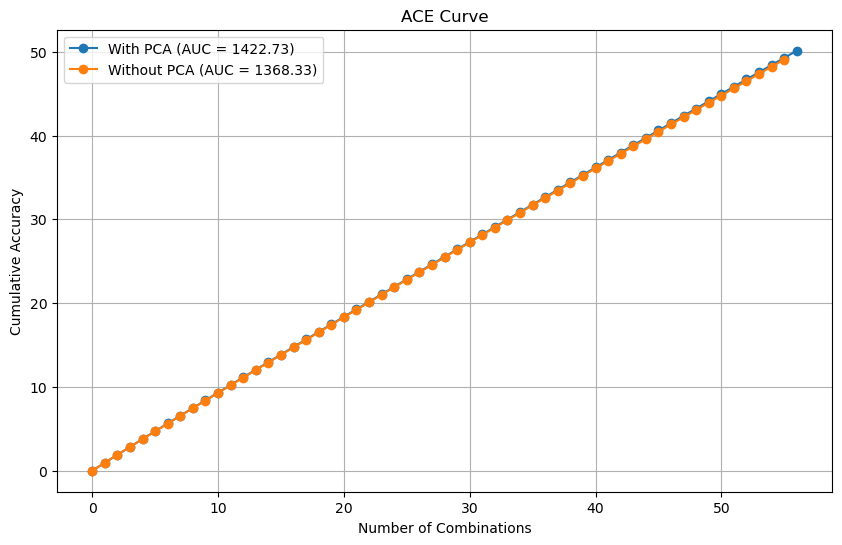

In [18]:
import matplotlib.pyplot as plt

# Sort accurate combinations based on accuracies
accurate_combinations_with_pca.sort(key=lambda x: x[1], reverse=True)
accurate_combinations_without_pca.sort(key=lambda x: x[1], reverse=True)

# Calculate cumulative sum of accuracies
cumulative_accuracy_with_pca = [0] + list(np.cumsum([accuracy for _, accuracy in accurate_combinations_with_pca]))
cumulative_accuracy_without_pca = [0] + list(np.cumsum([accuracy for _, accuracy in accurate_combinations_without_pca]))

# Calculate AUC
auc_with_pca = np.trapz(cumulative_accuracy_with_pca, dx=1)
auc_without_pca = np.trapz(cumulative_accuracy_without_pca, dx=1)

# Plot ACE curve
plt.figure(figsize=(10, 6))
plt.plot(cumulative_accuracy_with_pca, label=f'With PCA (AUC = {auc_with_pca:.2f})', marker='o')
plt.plot(cumulative_accuracy_without_pca, label=f'Without PCA (AUC = {auc_without_pca:.2f})', marker='o')
plt.xlabel('Number of Combinations')
plt.ylabel('Cumulative Accuracy')
plt.title('ACE Curve')
plt.legend()
plt.grid(True)
plt.show()
